In [90]:
from PIL import Image
import matplotlib.pyplot as plt

In [91]:
# initialising some constants
logo_size_ratio = 1.5
logo_displacement_x = 400
logo_displacement_y = 250
photos_directory = "../resources/photos_to_brandify"
LOGO_PATH = "../resources/NuIEEE_logos"
BRANDED_PHOTOS_DIRECTORY = "../brandified_photos"

In [92]:
# getting the files
total_files = len(os.listdir(photos_directory))
completed_files = 0
filename_array = list(filter(lambda filename: filename.endswith(".jpg") 
                            or filename.endswith(".png") 
                            or filename.endswith(".JPG"), 
                        os.listdir(photos_directory)))
total_i = len(filename_array)
print(filename_array)

['IMG_0006.jpg', 'IMG_8615.jpg', 'IMG_8734.JPG']


In [93]:
# selecting image
example_photo_filename = filename_array[2]
print(example_photo_filename)

IMG_8734.JPG


In [94]:
logo_path_blue = LOGO_PATH + "/" + "NuIEEE_logo_blue.png"
logo_template = Image.open(logo_path_blue)
logo_template = logo_template.convert("RGBA")
logo_width = int(logo_size_ratio * logo_template.size[0])
logo_height = int((logo_width / logo_template.size[0]) * logo_template.size[1])
logo_template = logo_template.resize((logo_width, logo_height), Image.LANCZOS)

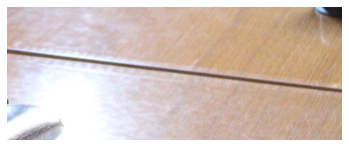

In [95]:
photo_path = photos_directory + "/" + example_photo_filename
photo = Image.open(photo_path)
region = photo.crop((photo.width - logo_displacement_x - logo_width, 
                    photo.height - logo_displacement_y - logo_height, 
                    photo.width, 
                    photo.height))
plt.imshow(region)
plt.axis('off')
plt.show()

In [96]:
# analysing region's brightness
region = region.convert("RGB")
region_data = region.getdata()
brightness_threshold = 170 
brightness_sum = 0
pixel_count = 0

for pixel in region_data:
    r, g, b = pixel[:3]
    brightness = (r + g + b) // 3
    brightness_sum += brightness
    pixel_count += 1
average_brightness = brightness_sum // pixel_count

if average_brightness < brightness_threshold:
    logo_color = "white"
else:
    logo_color = "black"

print(logo_color)

black


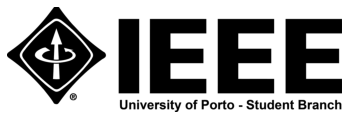

In [97]:
# resizes the logo to the size of the region
logo = Image.open(LOGO_PATH + "/" + f'NuIEEE_logo_{logo_color}.png')
logo = logo.convert("RGBA")
logo = logo.resize((logo_width, logo_height), Image.LANCZOS)

plt.imshow(logo)
plt.axis('off')
plt.show()

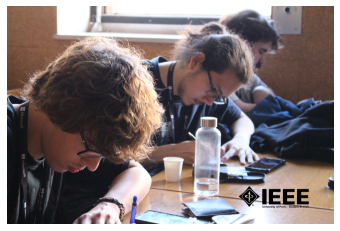

In [98]:
# paste the logo in the right position in the photo
photo = Image.open(photo_path)
photo = photo.convert("RGBA")

position = (
    photo.width - logo.width - logo_displacement_x, 
    photo.height - logo.height - logo_displacement_y
)

image_with_logo = Image.new("RGBA", photo.size)
image_with_logo.paste(photo, (0, 0))
image_with_logo.paste(logo, position, mask=logo.split()[3])

plt.imshow(image_with_logo)
plt.axis('off')
plt.show()